In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
%matplotlib inline
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
df.shape

(614, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

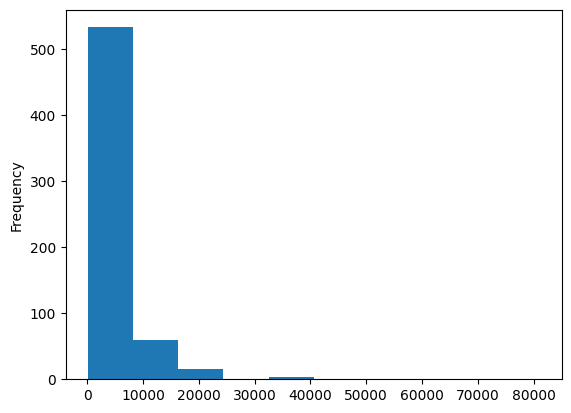

In [25]:
df["ApplicantIncome"].plot(kind="hist")
plt.show()

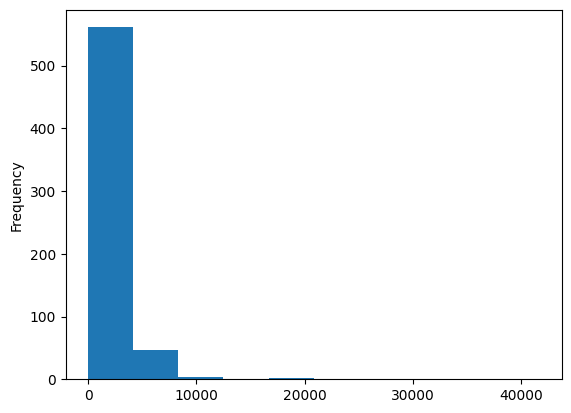

In [52]:
df["ApplicantIncome"].fillna(df["ApplicantIncome"].mean(), inplace=True)
df["CoapplicantIncome"].plot(kind="hist")
plt.show()

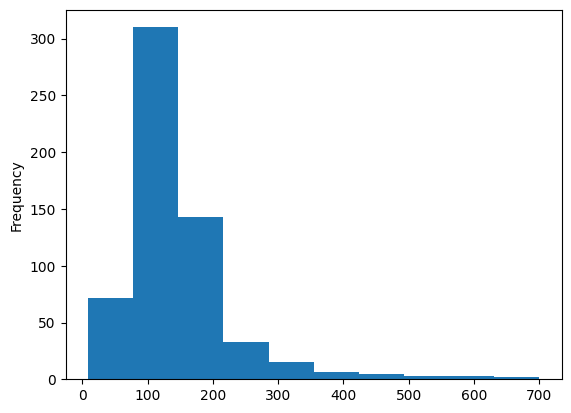

In [29]:
df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean(), inplace=True)
df["LoanAmount"].plot(kind="hist")
plt.show()

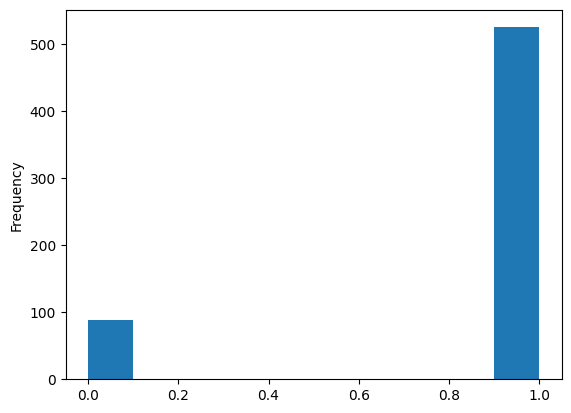

In [53]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Credit_History"].plot(kind="hist")
plt.show()

In [34]:
df["Credit_History"].fillna(np.random.randint(0,2), inplace=True)
grouped_df = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Credit_History"]].groupby(df["Loan_Status"])
mean = grouped_df.mean()
mean

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,5446.078125,1877.807292,150.945488,0.572917
Y,5384.068720,1504.516398,144.349606,0.983412


In [35]:
median = grouped_df.median()
median

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,3833.5,268.0,133.5,1.0
Y,3812.5,1239.5,128.0,1.0


In [36]:
min = grouped_df.min()
min

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,150,0.0,9.0,0.0
Y,210,0.0,17.0,0.0


In [37]:
max = grouped_df.max()
max

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,81000,41667.0,570.0,1.0
Y,63337,20000.0,700.0,1.0


In [38]:
std = grouped_df.std()
std

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,6819.558528,4384.060103,83.361163,0.495948
Y,5765.441615,1924.754855,84.361109,0.127872


In [39]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["label"] = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
iris_df.shape

(150, 5)

In [42]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [45]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [46]:
setosa = iris_df[iris_df["label"] == 0].drop("label", axis=1)
setosa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


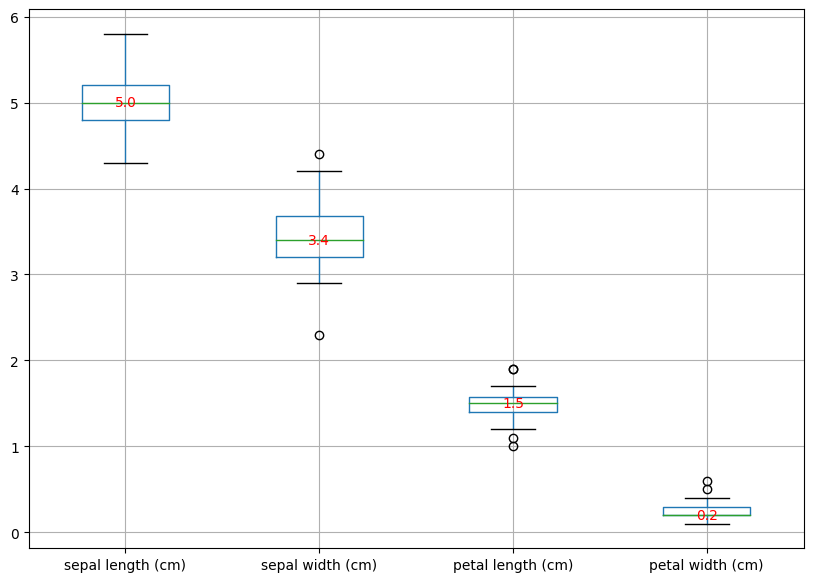

In [47]:
plt.figure(figsize=(10,7))
box = setosa.boxplot()
medians = setosa.median()
for i in range(len(medians)):
    box.annotate(medians[i], (i+1, medians[i]), ha="center", va="center", color="red", size=10)
plt.show()

In [48]:
versicolor = iris_df[iris_df["label"] == 1].drop("label", axis=1)
versicolor.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


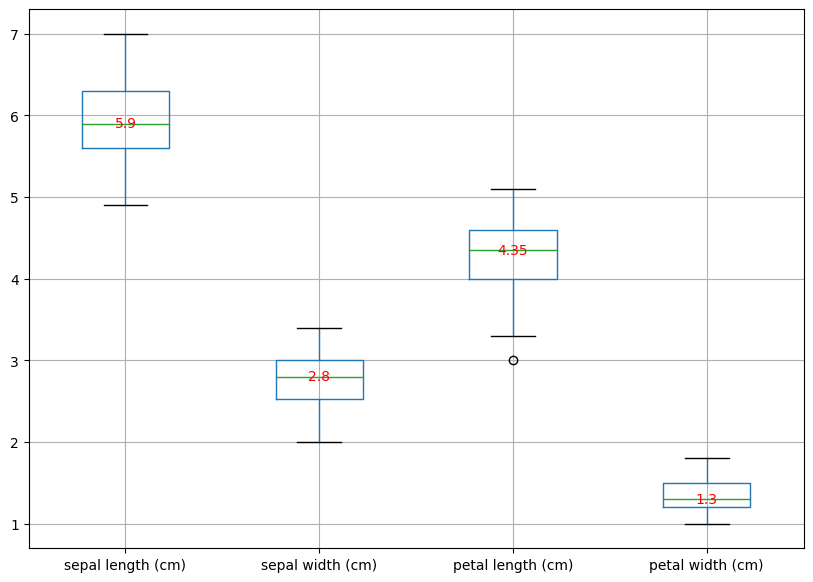

In [49]:
plt.figure(figsize=(10,7))
box = versicolor.boxplot()
medians = versicolor.median()
for i in range(len(medians)):
    box.annotate(medians[i], (i+1, medians[i]), ha="center", va="center", color="red", size=10)
plt.show()

In [50]:
virginica = iris_df[iris_df["label"] == 2].drop("label", axis=1)
virginica.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


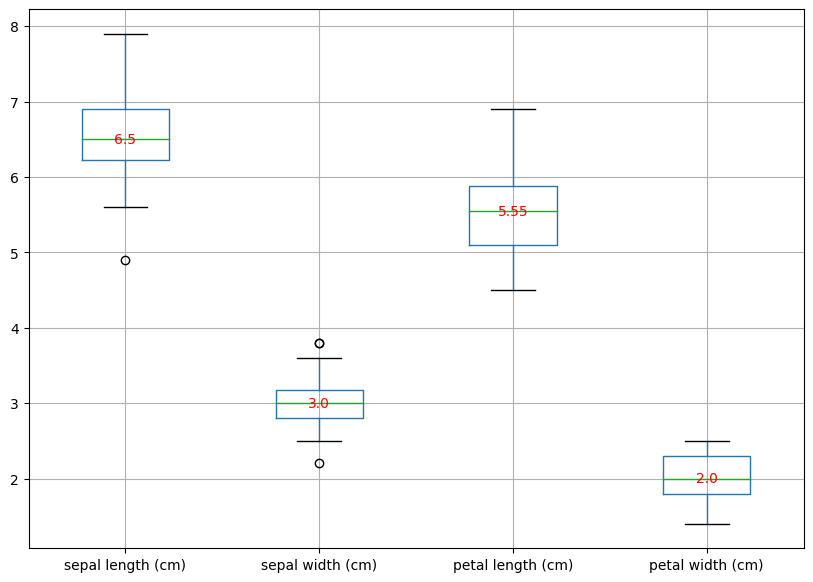

In [51]:
plt.figure(figsize=(10,7))
box = virginica.boxplot()
medians = virginica.median()
for i in range(len(medians)):
    box.annotate(medians[i], (i+1, medians[i]), ha="center", va="center", color="red", size=10)
plt.show()